<a href="https://colab.research.google.com/github/JoelVilc/DS-M4-Cluster_Hadoop/blob/main/MyPrimerModeloML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MarathonData.csv to MarathonData.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['MarathonData.csv']))


In [ ]:
df

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [ ]:
df['Wall21'] = pd.to_numeric(df['Wall21'], errors='coerce')

In [ ]:
df.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'km4week'}>],
       [<Axes: title={'center': 'sp4week'}>,
        <Axes: title={'center': 'Wall21'}>],
       [<Axes: title={'center': 'MarathonTime'}>, <Axes: >]], dtype=object)

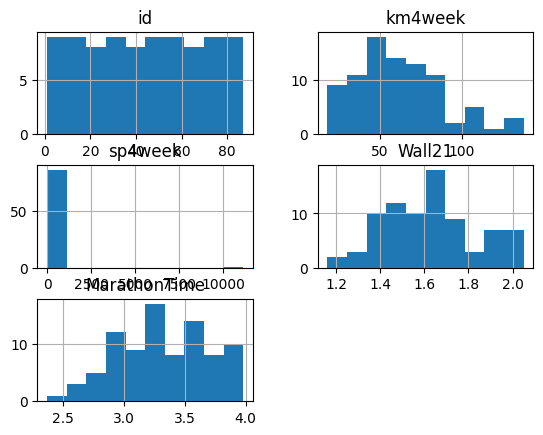

In [ ]:
df.hist()

In [ ]:
df.drop(columns=['id', 'Name', 'Marathon', 'CATEGORY'], inplace=True)

In [ ]:
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


In [ ]:
df.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

In [ ]:
df['CrossTraining'] = df['CrossTraining'].fillna(0)
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [ ]:
values_cross = {'CrossTraining':{'ciclista 1h': 1, 'ciclista 2h': 2, 'ciclista 3h': 3, 'ciclista 4h': 5, 'ciclista 5h': 5}}
df.replace(values_cross, inplace=True)

In [ ]:
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,3,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [ ]:
df.Category.unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', nan, 'WAM'], dtype=object)

In [ ]:
values_category = {'Category':{'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5, 'NaN':6, 'WAM':7}}
df.replace(values_category, inplace=True)

In [ ]:
df.isna().sum()

Category         6
km4week          0
sp4week          0
CrossTraining    0
Wall21           6
MarathonTime     0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Category         0
km4week          0
sp4week          0
CrossTraining    0
Wall21           0
MarathonTime     0
dtype: int64

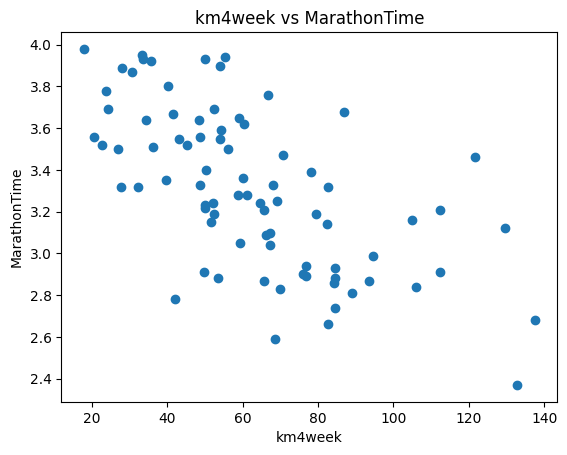

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df['km4week'], y=df['MarathonTime'])
plt.title('km4week vs MarathonTime')
plt.xlabel('km4week')
plt.ylabel('MarathonTime')
plt.show()

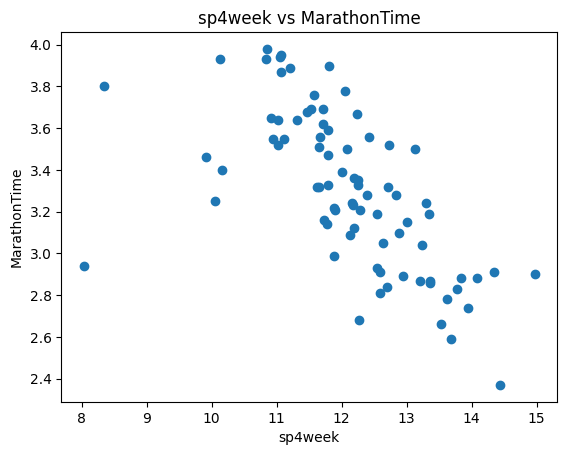

In [ ]:
plt.scatter(x=df['sp4week'], y=df['MarathonTime'])
plt.title('sp4week vs MarathonTime')
plt.xlabel('sp4week')
plt.ylabel('MarathonTime')
plt.show()

In [ ]:
df = df.query('sp4week < 1000')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       80 non-null     float64
 1   km4week        80 non-null     float64
 2   sp4week        80 non-null     float64
 3   CrossTraining  80 non-null     object 
 4   Wall21         80 non-null     float64
 5   MarathonTime   80 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.4+ KB


In [ ]:
df['CrossTraining'] = pd.to_numeric(df['CrossTraining'], errors='coerce')

<ipython-input-49-a6a3eae2b6dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CrossTraining'] = pd.to_numeric(df['CrossTraining'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       80 non-null     float64
 1   km4week        80 non-null     float64
 2   sp4week        80 non-null     float64
 3   CrossTraining  79 non-null     float64
 4   Wall21         80 non-null     float64
 5   MarathonTime   80 non-null     float64
dtypes: float64(6)
memory usage: 4.4 KB


In [ ]:
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1.0,132.8,14.434783,0.0,1.16,2.37
1,1.0,68.6,13.674419,0.0,1.23,2.59
2,1.0,82.7,13.520436,0.0,1.30,2.66
3,2.0,137.5,12.258544,0.0,1.32,2.68
4,1.0,84.6,13.945055,0.0,1.36,2.74
...,...,...,...,...,...,...
82,5.0,50.0,10.830325,0.0,2.02,3.93
83,3.0,33.6,10.130653,3.0,1.94,3.93
84,3.0,55.4,11.043189,0.0,1.94,3.94
85,2.0,33.2,11.066667,0.0,2.05,3.95


In [ ]:
# df.query('Category == 7')
df['Category'] = df['Category'].replace(7, 6)

<ipython-input-56-1b82bb177aa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['Category'].replace(7, 6)


In [ ]:
df.query('Category == 6')

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
26,6.0,129.6,12.188088,0.0,1.54,3.12
39,6.0,69.2,10.053269,0.0,1.60,3.25
46,6.0,48.6,12.252101,0.0,1.66,3.33
72,6.0,52.3,11.708955,0.0,1.94,3.69


In [ ]:
datos_entrenamiento = df.sample(frac=0.8, random_state=0)
datos_test = df.drop(datos_entrenamiento.index)

In [ ]:
datos_entrenamiento
# datos_test

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
54,3.0,70.7,11.783333,0.0,1.77,3.47
28,2.0,51.6,13.008403,0.0,1.50,3.15
31,1.0,79.4,13.344538,0.0,1.60,3.19
84,3.0,55.4,11.043189,0.0,1.94,3.94
47,2.0,39.6,12.247423,0.0,1.67,3.35
...,...,...,...,...,...,...
55,1.0,26.9,13.121951,0.0,1.67,3.50
20,1.0,94.5,11.886792,0.0,1.45,2.99
79,1.0,53.9,11.802920,0.0,1.98,3.90
8,1.0,70.0,13.770492,1.0,1.38,2.83


In [ ]:
# etiquetas_entrenamiento = datos_entrenamiento.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime')

In [ ]:
datos_entrenamiento.isna().sum()
datos_entrenamiento['CrossTraining'] = datos_entrenamiento['CrossTraining'].fillna(0)

In [ ]:
etiquetas_test

9     2.86
12    2.88
21    3.04
26    3.12
38    3.24
39    3.25
41    3.28
46    3.33
48    3.36
49    3.39
62    3.56
68    3.65
69    3.67
71    3.69
75    3.78
83    3.93
Name: MarathonTime, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento, etiquetas_entrenamiento)

LinearRegression()

In [ ]:
predicciones = modelo.predict(datos_test)
predicciones

array([2.79030865, 2.76806581, 3.0545364 , 3.03208274, 3.06226354,
       3.28883998, 3.35668743, 3.35664305, 3.17675503, 3.29363125,
       3.38223222, 3.52842433, 3.59963517, 3.52790619, 3.62691633,
       3.83388863])

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print('Error porcentual: ', round((error*100),2))

Error porcentual:  11.68


In [ ]:
nuevo_corredor = pd.DataFrame(np.array([[1,400,15,0,1.4]]), columns=['Category','km4week','sp4week','CrossTraining','Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,15.0,0.0,1.4


In [ ]:
modelo.predict(nuevo_corredor)

array([2.28311721])